**TP1**

Parte 1 (imágenes en /white_patch):

Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

Parte 2:

Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grises y visualizarlas.

Elija el número de bins que crea conveniente y grafique su histograma, compare los histogramas entre sí. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, ¿considera que puede ser de utilidad tomar como features a los histogramas?

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


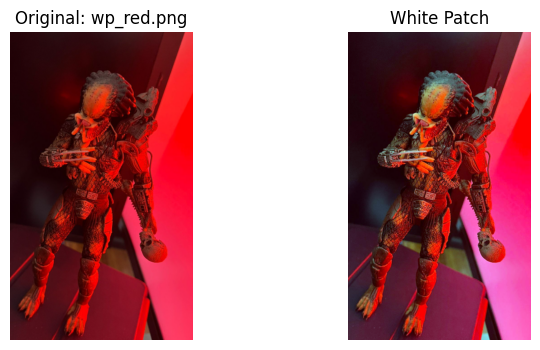

✅ Procesada wp_red.png -> /content/drive/MyDrive/Colab Notebooks/white_patch/imagenes_procesadas/wp_red_wp.png


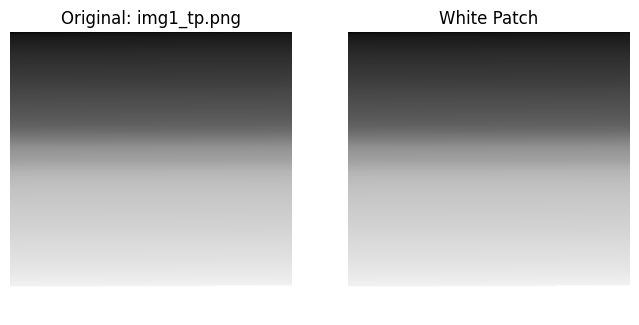

✅ Procesada img1_tp.png -> /content/drive/MyDrive/Colab Notebooks/white_patch/imagenes_procesadas/img1_tp_wp.png


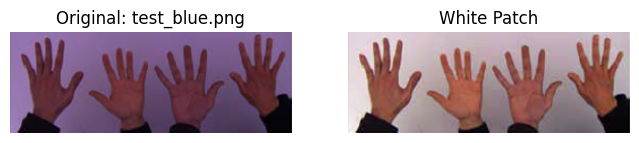

✅ Procesada test_blue.png -> /content/drive/MyDrive/Colab Notebooks/white_patch/imagenes_procesadas/test_blue_wp.png


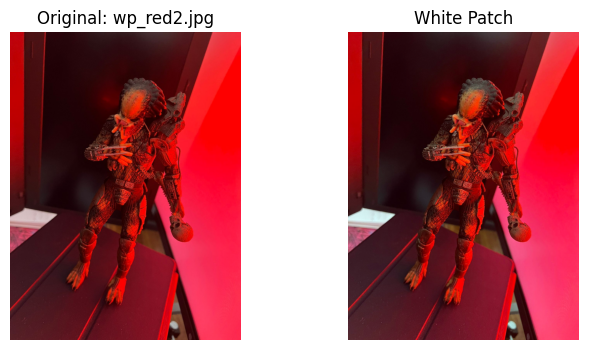

✅ Procesada wp_red2.jpg -> /content/drive/MyDrive/Colab Notebooks/white_patch/imagenes_procesadas/wp_red2_wp.jpg


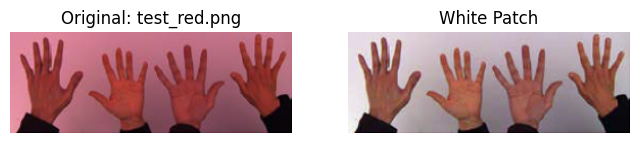

✅ Procesada test_red.png -> /content/drive/MyDrive/Colab Notebooks/white_patch/imagenes_procesadas/test_red_wp.png


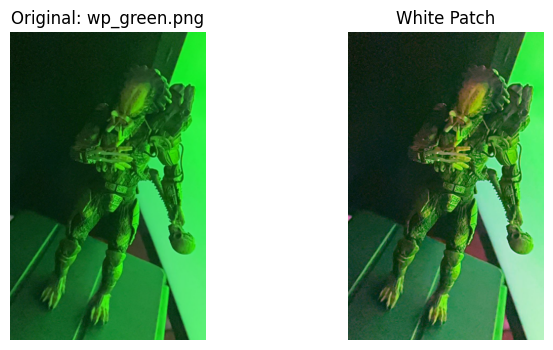

✅ Procesada wp_green.png -> /content/drive/MyDrive/Colab Notebooks/white_patch/imagenes_procesadas/wp_green_wp.png


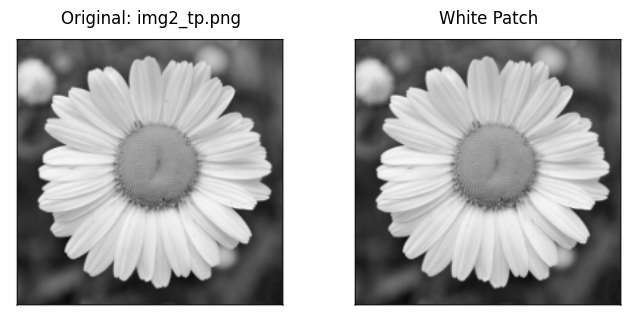

✅ Procesada img2_tp.png -> /content/drive/MyDrive/Colab Notebooks/white_patch/imagenes_procesadas/img2_tp_wp.png


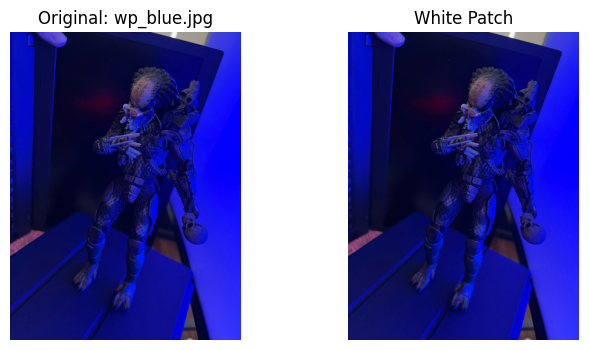

✅ Procesada wp_blue.jpg -> /content/drive/MyDrive/Colab Notebooks/white_patch/imagenes_procesadas/wp_blue_wp.jpg


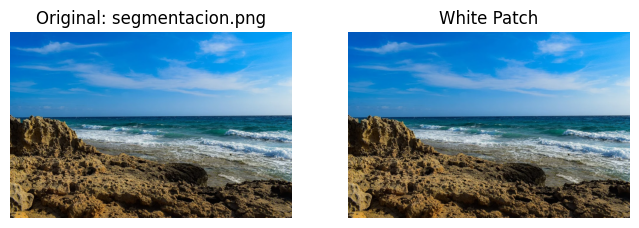

✅ Procesada segmentacion.png -> /content/drive/MyDrive/Colab Notebooks/white_patch/imagenes_procesadas/segmentacion_wp.png


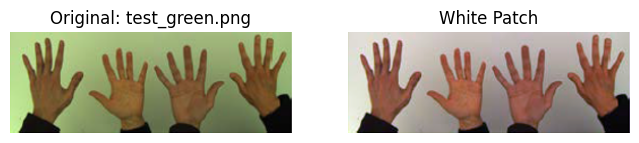

✅ Procesada test_green.png -> /content/drive/MyDrive/Colab Notebooks/white_patch/imagenes_procesadas/test_green_wp.png


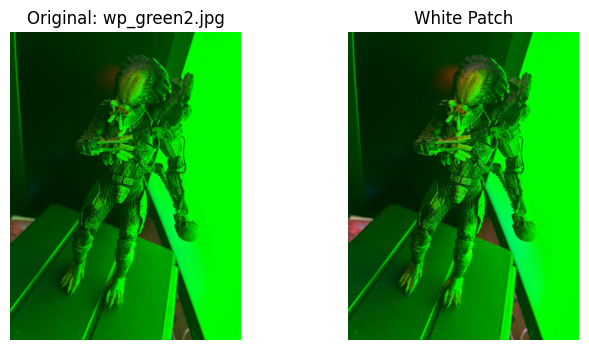

✅ Procesada wp_green2.jpg -> /content/drive/MyDrive/Colab Notebooks/white_patch/imagenes_procesadas/wp_green2_wp.jpg


In [1]:
# ===== PARTE 1: WHITE PATCH =====

# ===== MONTAJE DE GOOGLE DRIVE =====
from google.colab import drive
drive.mount('/content/drive')

# ===== LIBRERÍAS =====
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# ===== ALGORITMO WHITE PATCH =====
def white_patch_algorithm(img):
    img = img.astype(np.float32)
    max_vals = np.max(img, axis=(0, 1))  # máximo de cada canal
    for c in range(3):
        if max_vals[c] > 0:
            img[:, :, c] = img[:, :, c] / max_vals[c] * 255
    return np.clip(img, 0, 255).astype(np.uint8)

# ===== RUTA DE LA CARPETA =====
carpeta = "/content/drive/MyDrive/Colab Notebooks/white_patch"
carpeta_out = os.path.join(carpeta, "imagenes_procesadas")
os.makedirs(carpeta_out, exist_ok=True)

# ===== PROCESAR TODAS LAS IMÁGENES =====
for archivo in os.listdir(carpeta):
    if archivo.lower().endswith((".png", ".jpg", ".jpeg")):
        path_in = os.path.join(carpeta, archivo)

        # Leer imagen
        img = cv2.imread(path_in)
        if img is None:
            print(f"⚠️ No se pudo leer: {archivo}")
            continue

        # Aplicar algoritmo
        img_wp = white_patch_algorithm(img)

        # Guardar resultado en la carpeta de salida
        nombre, ext = os.path.splitext(archivo)
        path_out = os.path.join(carpeta_out, f"{nombre}_wp{ext}")
        cv2.imwrite(path_out, img_wp)

        # Mostrar original y corregida
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_wp_rgb = cv2.cvtColor(img_wp, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(8,4))
        plt.subplot(1,2,1)
        plt.imshow(img_rgb)
        plt.title(f"Original: {archivo}")
        plt.axis("off")

        plt.subplot(1,2,2)
        plt.imshow(img_wp_rgb)
        plt.title("White Patch")
        plt.axis("off")
        plt.show()

        print(f"✅ Procesada {archivo} -> {path_out}")


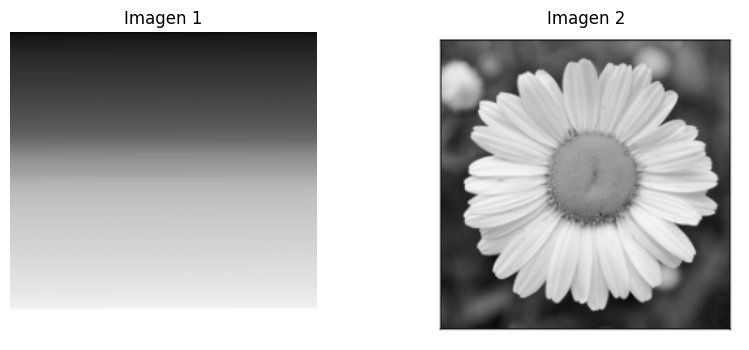

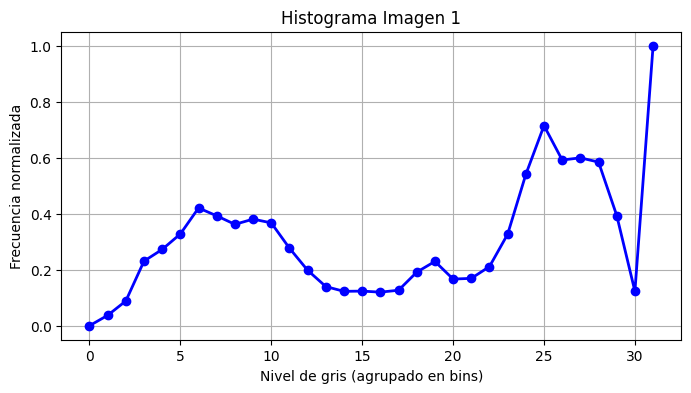

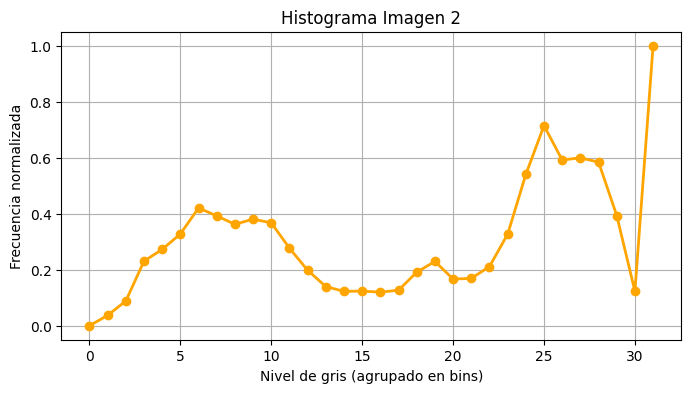


Correlación: 1.0
Chi-cuadrado: 0.0
Bhattacharyya: 0.0
Suma de las diferencias de intensidad de todos los píxeles: 7122892



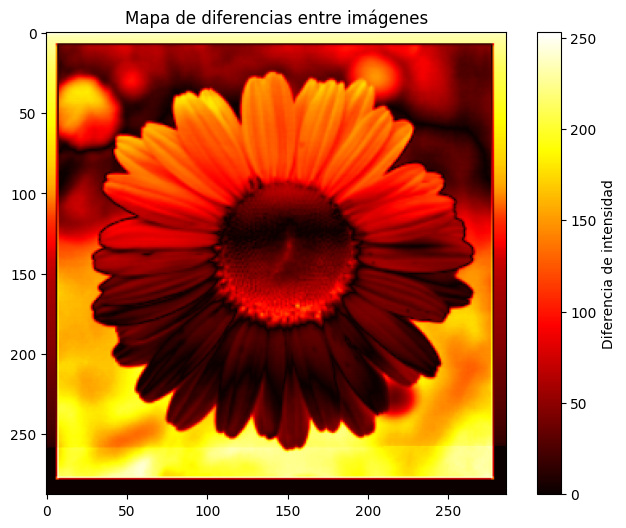

In [2]:
# ===== PARTE 2: HISTOGRAMAS =====
img1_path = "/content/drive/MyDrive/Colab Notebooks/white_patch/img1_tp.png"
img2_path = "/content/drive/MyDrive/Colab Notebooks/white_patch/img2_tp.png"

img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

if img1 is None or img2 is None:
    print("⚠️ ¡ERROR! No se encontraron img1_tp.png y/o img2_tp.png")
else:
    # Nos aseguramos que tengan el mismo tamaño
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # =================== Mostrar imágenes ===================
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.imshow(img1, cmap="gray")
    plt.title("Imagen 1")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(img2, cmap="gray")
    plt.title("Imagen 2")
    plt.axis("off")

    plt.show()

    # =================== Calcular histogramas ===================
    bins = 32
    hist1 = cv2.calcHist([img1], [0], None, [bins], [0, 256])
    hist2 = cv2.calcHist([img2], [0], None, [bins], [0, 256])

    # Normalizar para que las curvas sean comparables
    hist1 = hist1 / hist1.max()
    hist2 = hist2 / hist2.max()

    # =================== Graficar histogramas por separado ===================
    plt.figure(figsize=(8,4))
    plt.plot(hist1.ravel(), color='blue', linewidth=2, marker='o')
    plt.title("Histograma Imagen 1")
    plt.xlabel("Nivel de gris (agrupado en bins)")
    plt.ylabel("Frecuencia normalizada")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8,4))
    plt.plot(hist2.ravel(), color='orange', linewidth=2, marker='o')
    plt.title("Histograma Imagen 2")
    plt.xlabel("Nivel de gris (agrupado en bins)")
    plt.ylabel("Frecuencia normalizada")
    plt.grid(True)
    plt.show()

    # =================== Comparación de histogramas ===================
    dist_corr = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    dist_chi = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    dist_bhatt = cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)
    print()
    print("Correlación:", dist_corr)
    print("Chi-cuadrado:", dist_chi)
    print("Bhattacharyya:", dist_bhatt)

    # =================== Diferencia pixel a pixel ===================
    diff = cv2.absdiff(img1, img2)
    print("Suma de las diferencias de intensidad de todos los píxeles:", np.sum(diff))
    print()
    # Mostrar mapa de diferencias
    plt.figure(figsize=(8,6))
    plt.imshow(diff, cmap='hot')
    plt.colorbar(label='Diferencia de intensidad')
    plt.title("Mapa de diferencias entre imágenes")
    plt.show()

# ========================================================
#          Informe: White Patch + Histogramas
# ========================================================

## Parte 1: Algoritmo White Patch

### Librerías usadas
- cv2 → OpenCV, para procesamiento de imágenes: leer, modificar y guardar imágenes.
- numpy → manejar arreglos y operaciones matemáticas sobre las matrices de píxeles.
- os → listar archivos de carpetas y construir rutas.
- matplotlib.pyplot → mostrar imágenes y gráficos dentro de Colab.

### Función white_patch_algorithm(img)
**Objetivo:** corregir el balance de blancos usando el principio de que el píxel más brillante debería ser blanco.

**Paso a paso:**
1. img.astype(np.float32) → convierte la imagen a flotante para operaciones precisas.
2. np.max(img, axis=(0,1)) → encuentra el valor máximo de cada canal de color (B, G, R).
3. Para cada canal:
   - Dividir todos los píxeles por el valor máximo.
   - Multiplicar por 255 para escalar el canal.
4. np.clip(img, 0, 255) → asegura que los valores queden en el rango válido.
5. astype(np.uint8) → vuelve la imagen a enteros para poder guardarla como PNG/JPG.

**Concepto principal:** elimina dominantes de color; por ejemplo, si la imagen está azulada, el azul se normaliza y los otros canales se ajustan proporcionalmente.

### Procesar todas las imágenes de una carpeta
- os.listdir(carpeta) → obtiene todos los archivos de la carpeta.
- archivo.lower().endswith(...) → filtra solo imágenes.
- cv2.imread(path_in) → carga la imagen en BGR.
- cv2.imwrite(path_out, img_wp) → guarda la imagen procesada con _wp agregado al nombre.

Para mostrar la original y la corregida:
- cv2.cvtColor(img, cv2.COLOR_BGR2RGB) → convierte BGR a RGB para matplotlib.
- plt.subplot → permite mostrar ambas imágenes lado a lado.
- plt.axis("off") → oculta los ejes, mostrando solo las imágenes.

---

## Parte 2: Histogramas

### Cargar imágenes en escala de grises
- cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) → convierte automáticamente la imagen a gris.
- Permite calcular histogramas de intensidad más fácilmente.
- Si la imagen no existe, se muestra un mensaje de advertencia.

### Mostrar imágenes
- plt.imshow(img, cmap="gray") → muestra la imagen en escala de grises.
- plt.subplot → permite comparar varias imágenes lado a lado.

### Calcular histogramas
- cv2.calcHist([img], [0], None, [bins], [0, 256]) → calcula la frecuencia de píxeles por rango de gris.
- [0] → canal único porque la imagen es gris.
- bins → número de divisiones del rango 0-255.
- El histograma indica cuántos píxeles caen en cada rango de intensidad.

### Elección del número de bins = 32

- Dividir los **niveles de gris (0–255)** en 32 bins significa que cada bin abarca 8 niveles de gris.  
- **Razones de esta elección:**  
  - Permite **resumir la información** sin perder demasiada precisión.  
  - Evita tener un histograma demasiado ruidoso (como si se usaran 256 bins).  
  - Reduce la **dimensionalidad** de los features, facilitando el entrenamiento de modelos y evitando sobreajuste.  
  - Es un **compromiso práctico** entre detalle y simplicidad: suficiente para diferenciar distribuciones de brillo, pero no tan fino como para ser sensible a pequeñas variaciones de píxeles.

### Graficar histogramas
- plt.plot(hist.ravel()) → grafica la frecuencia de píxeles por bin.
- .ravel() → convierte el histograma a 1D, evitando problemas de visualización en matplotlib.
- Colores explícitos (blue y orange) permiten diferenciar las imágenes.
- Permite comparar visualmente el brillo y contraste de dos imágenes.

---

## Parte 3: Comparación de imágenes

- Aunque los histogramas sean idénticos, los píxeles pueden diferir.
- Métricas:
  - Correlación = 1.0 → histograma idéntico.
  - Chi-cuadrado = 0.0 → sin diferencias.
  - Bhattacharyya = 0.0 → coincidencia perfecta.
- Diferencias pixel a pixel muestran la manipulación real.
- np.sum(diff) → suma total de diferencias de intensidad.
- np.sum(diff>0) → cantidad de píxeles diferentes.
- El mapa de diferencias permite visualizar dónde y cuánto difieren los píxeles.

**Conclusión:** La imagen img1_tp.png fue ajustada para tener el mismo histograma que la imagen img2_tp.png, pero los píxeles no son idénticos.

---

## Uso de histogramas como features en modelos de clasificación/detección

Sí, los histogramas pueden ser útiles como features para entrenar un modelo de clasificación o detección de imágenes, aunque con ciertas consideraciones:

- **Ventajas:**  
  - Resumen rápido del contenido de la imagen en términos de **brillo y distribución de colores**.  
  - Son **invariantes a traslaciones** (mover la imagen no cambia el histograma).  
  - Pueden ser **muy eficientes** como features simples para clasificaciones básicas, por ejemplo distinguir imágenes claras de oscuras o con diferentes dominantes de color.  

- **Limitaciones:**  
  - No capturan **información espacial**; dos imágenes diferentes pueden tener histogramas idénticos (como en el caso del degradé y la flor).  
  - Para tareas complejas (detección de objetos, reconocimiento de escenas) suelen ser insuficientes y se combinan con otras features más ricas (HOG, SIFT, features de CNN, etc.).  

---

## Resumen conceptual
- **White Patch:** corrige la dominante de color ajustando el píxel más brillante a blanco.
- **Histogramas:** muestran la distribución de niveles de gris, útil para analizar brillo y contraste entre imágenes.




